In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

In [ ]:
import pandas as pd
import os
from PIL import Image, ImageChops, ImageEnhance
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]
if IN_COLAB:
  angryTrainList = get_imlist("/content/drive/MyDrive/Data/FER2013/train/angry")
  disgustTrainList = get_imlist("/content/drive/MyDrive/Data/FER2013/train/disgust")
  fearTrainList = get_imlist("/content/drive/MyDrive/Data/FER2013/train/fear")
  happyTrainList = get_imlist("/content/drive/MyDrive/Data/FER2013/train/happy")
  neutralTrainList = get_imlist("/content/drive/MyDrive/Data/FER2013/train/neutral")
  sadTrainList = get_imlist("/content/drive/MyDrive/Data/FER2013/train/sad")
  surpriseTrainList = get_imlist("/content/drive/MyDrive/Data/FER2013/train/surprise")
else:
  angryTrainList = get_imlist("../Data/FER2013/train/angry")
  disgustTrainList = get_imlist("../Data/FER2013/train/disgust")
  fearTrainList = get_imlist("../Data/FER2013/train/fear")
  happyTrainList = get_imlist("../Data/FER2013/train/happy")
  neutralTrainList = get_imlist("../Data/FER2013/train/neutral")
  sadTrainList = get_imlist("../Data/FER2013/train/sad")
  surpriseTrainList = get_imlist("../Data/FER2013/train/surprise")

In [ ]:
if IN_COLAB:
  angryTestList = get_imlist("/content/drive/MyDrive/Data/FER2013/test/angry")
  disgustTestList = get_imlist("/content/drive/MyDrive/Data/FER2013/test/disgust")
  fearTestList = get_imlist("/content/drive/MyDrive/Data/FER2013/test/fear")
  happyTestList = get_imlist("/content/drive/MyDrive/Data/FER2013/test/happy")
  neutralTestList = get_imlist("/content/drive/MyDrive/Data/FER2013/test/neutral")
  sadTestList = get_imlist("/content/drive/MyDrive/Data/FER2013/test/sad")
  surpriseTestList = get_imlist("/content/drive/MyDrive/Data/FER2013/test/surprise")
else:
  angryTestList = get_imlist("../Data/FER2013/test/angry")
  disgustTestList = get_imlist("../Data/FER2013/test/disgust")
  fearTestList = get_imlist("../Data/FER2013/test/fear")
  happyTestList = get_imlist("../Data/FER2013/test/happy")
  neutralTestList = get_imlist("../Data/FER2013/test/neutral")
  sadTestList = get_imlist("../Data/FER2013/test/sad")
  surpriseTestList = get_imlist("../Data/FER2013/test/surprise")

In [ ]:
combinedTrainList = angryTrainList + disgustTrainList + fearTrainList + happyTrainList + neutralTrainList + sadTrainList + surpriseTrainList
combinedTestList = angryTestList + disgustTestList + fearTestList + happyTestList + neutralTestList + sadTestList + surpriseTestList

In [ ]:
emotionsCombinedTrainList = [os.path.split(os.path.dirname(i))[-1] for i in combinedTrainList] 
emotionsCombinedTestList = [os.path.split(os.path.dirname(i))[-1] for i in combinedTestList] 

In [ ]:
trainDataframe = (pd.DataFrame(list(zip(combinedTrainList,emotionsCombinedTrainList)),columns = ['path','emotion'])).sample(frac=1,random_state = 42).reset_index(drop=True)
testDataframe = (pd.DataFrame(list(zip(combinedTestList,emotionsCombinedTestList)),columns = ['path','emotion'])).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
trainDataframe

,path,emotion
0,/content/drive/MyDrive/Data/FER2013/train/fear...,fear
1,/content/drive/MyDrive/Data/FER2013/train/happ...,happy
2,/content/drive/MyDrive/Data/FER2013/train/surp...,surprise
3,/content/drive/MyDrive/Data/FER2013/train/fear...,fear
4,/content/drive/MyDrive/Data/FER2013/train/surp...,surprise
...,...,...
28704,/content/drive/MyDrive/Data/FER2013/train/sad/...,sad
28705,/content/drive/MyDrive/Data/FER2013/train/fear...,fear
28706,/content/drive/MyDrive/Data/FER2013/train/angr...,angry
28707,/content/drive/MyDrive/Data/FER2013/train/neut...,neutral


In [ ]:
testDataframe

,path,emotion
0,/content/drive/MyDrive/Data/FER2013/test/neutr...,neutral
1,/content/drive/MyDrive/Data/FER2013/test/happy...,happy
2,/content/drive/MyDrive/Data/FER2013/test/neutr...,neutral
3,/content/drive/MyDrive/Data/FER2013/test/sad/P...,sad
4,/content/drive/MyDrive/Data/FER2013/test/fear/...,fear
...,...,...
7173,/content/drive/MyDrive/Data/FER2013/test/happy...,happy
7174,/content/drive/MyDrive/Data/FER2013/test/sad/P...,sad
7175,/content/drive/MyDrive/Data/FER2013/test/sad/P...,sad
7176,/content/drive/MyDrive/Data/FER2013/test/sad/P...,sad


In [ ]:
trainDFCounts = trainDataframe['emotion'].value_counts()

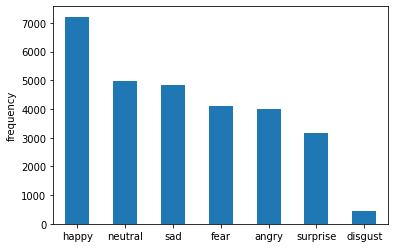

In [ ]:
fig,ax = plt.subplots()
trainDFCounts.plot(ax = ax,kind = 'bar',ylabel = 'frequency')
plt.xticks(rotation=0)
plt.show()

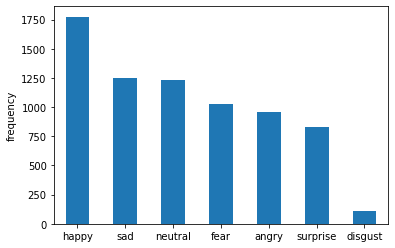

In [ ]:
testDFCounts = testDataframe['emotion'].value_counts()
fig,ax = plt.subplots()
testDFCounts.plot(ax = ax,kind = 'bar',ylabel = 'frequency')
plt.xticks(rotation=0)
plt.show()

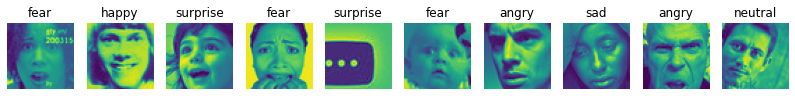

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for path in trainDataframe.head(10)['path']:
    img = Image.open(path)
    plt.subplot(1,10,i)
    plt.title(trainDataframe.head(10)['emotion'][i - 1])
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/drive/MyDrive/Data/FER2013/train/"
test_dir = "/content/drive/MyDrive/Data/FER2013/test/"
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

In [ ]:
def get_model(input_size, classes=7):
    
     #Initialising the CNN
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [ ]:
FERModel = get_model((48,48,1))
FERModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


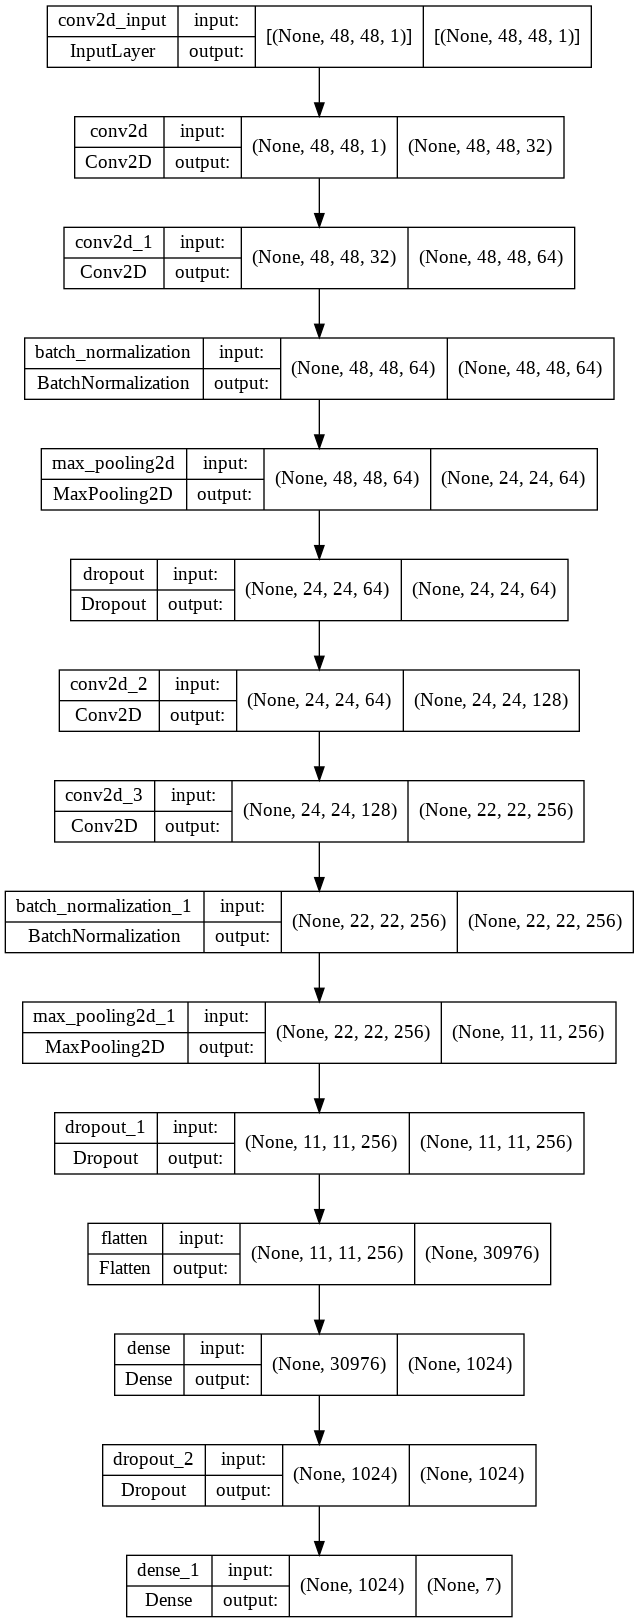

In [ ]:
plot_model(FERModel, show_shapes=True, show_layer_names=True)

In [ ]:
import datetime
if IN_COLAB:
  chk_path = 'FERModel.h5'
  log_dir = "/content/drive/MyDrive/FERWeights/checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
else:
  chk_path = 'FERModel.h5'
  log_dir = "../checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = FERModel.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - ETA: 0s - loss: 4.3072 - accuracy: 0.2769 
Epoch 1: val_loss improved from inf to 6.45022, saving model to FERModel.h5
448/448 [==============================] - 6958s 16s/step - loss: 4.3072 - accuracy: 0.2769 - val_loss: 6.4502 - val_accuracy: 0.3393 - lr: 1.0000e-04
Epoch 2/60
448/448 [==============================] - ETA: 0s - loss: 3.5145 - accuracy: 0.3385
Epoch 2: val_loss improved from 6.45022 to 3.15157, saving model to FERModel.h5
448/448 [==============================] - 61s 136ms/step - loss: 3.5145 - accuracy: 0.3385 - val_loss: 3.1516 - val_accuracy: 0.4003 - lr: 1.0000e-04
Epoch 3/60
448/448 [==============================] - ETA: 0s - loss: 3.0003 - accuracy: 0.3693
Epoch 3: val_loss improved from 3.15157 to 2.79052, saving model to FERModel.h5
448/448 [==============================] - 60s 133ms/step - loss: 3.0003 - accuracy: 0.3693 - val_loss: 2.7905 - val_accuracy: 0.3796 - lr: 1.0000e-04
Epoch 4/60
448/448 [==

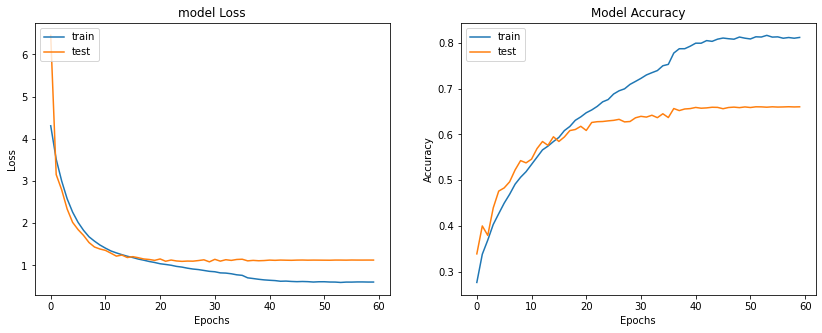

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
train_loss, train_accu = FERModel.evaluate(training_set)
test_loss, test_accu = FERModel.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 10s 84ms/step - loss: 1.1243 - accuracy: 0.6599
final train accuracy = 88.86 , validation accuracy = 65.99


In [ ]:
FERModel.save_weights('FERModel_bestweight.h5')

Confusion Matrix
[[ 550   53  522 1054  731  624  461]
 [  72    5   43  110   78   85   43]
 [ 535   56  511 1073  728  724  470]
 [ 987   80  940 1847 1342 1231  788]
 [ 654   79  613 1348  910  812  549]
 [ 686   72  638 1196  882  823  533]
 [ 405   52  446  789  577  547  355]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14      3995
     disgust       0.01      0.01      0.01       436
        fear       0.14      0.12      0.13      4097
       happy       0.25      0.26      0.25      7215
     neutral       0.17      0.18      0.18      4965
         sad       0.17      0.17      0.17      4830
    surprise       0.11      0.11      0.11      3171

    accuracy                           0.17     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.17      0.17     28709



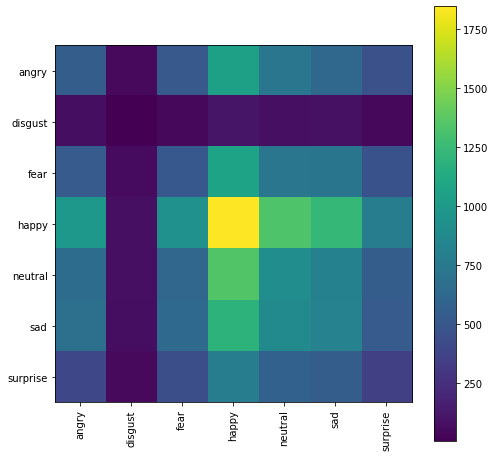

In [ ]:
import numpy as np
y_pred = FERModel.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

Confusion Matrix
[[126   6 114 237 214 159 102]
 [ 18   0  13  29  24  14  13]
 [145  13 118 244 189 191 124]
 [265  20 198 434 357 310 190]
 [165  10 142 315 252 208 141]
 [172  14 144 331 215 209 162]
 [123   8  84 201 157 148 110]]
Classification Report
              precision    recall  f1-score   support

       angry       0.12      0.13      0.13       958
     disgust       0.00      0.00      0.00       111
        fear       0.15      0.12      0.13      1024
       happy       0.24      0.24      0.24      1774
     neutral       0.18      0.20      0.19      1233
         sad       0.17      0.17      0.17      1247
    surprise       0.13      0.13      0.13       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



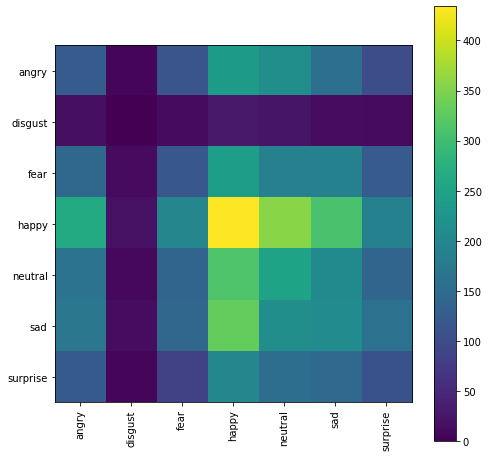

In [ ]:
y_pred = FERModel.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)